In [1]:
from A3C.agent import Agent
from A3C.model import Model
from A3C.training_controller import a3c_train

from shared.memory_manager import MemoryManager

import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

import os


Loading environment football failed: No module named 'gfootball'


In [2]:
state_dict = None

rewards = []
places = []
policy_loss = []
entropy_loss = []
value_loss = []

In [3]:
iterations = 500
devices = ["cpu"] * 16
learning_rate = 1e-4
entropy_weight = 10
opponents = ["greedy"] * 3

In [4]:
state_dict, add_rewards, add_places, add_policy_loss, add_entropy_loss, add_value_loss = a3c_train(state_dict, iterations, learning_rate, entropy_weight, opponents, devices)

rewards = np.concatenate([rewards, add_rewards])
places = np.concatenate([places, add_places])
policy_loss = np.concatenate([policy_loss, add_policy_loss])
entropy_loss = np.concatenate([entropy_loss, add_entropy_loss])
value_loss = np.concatenate([value_loss, add_value_loss])


Current Iteration 499/500, 99.80%, Policy loss: -305.76, entropy loss: -26.36, value loss: 310.91, place: 2.5

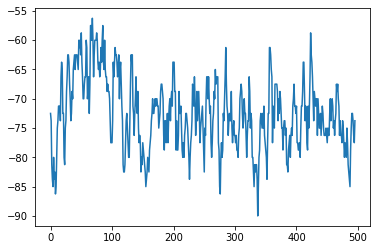

In [5]:
N = int(len(rewards) / 100)
plt.plot(np.convolve(rewards, np.ones(N)/N, mode='valid'))

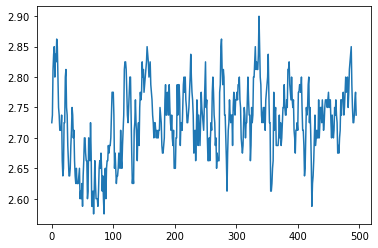

In [6]:
plt.plot(np.convolve(places, np.ones(N)/N, mode='valid'))

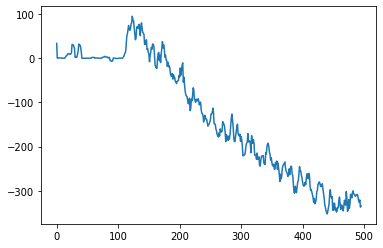

In [7]:
plt.plot(np.convolve(policy_loss, np.ones(N)/N, mode='valid'))

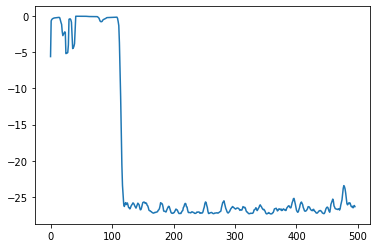

In [8]:
plt.plot(np.convolve(entropy_loss, np.ones(N)/N, mode='valid'))

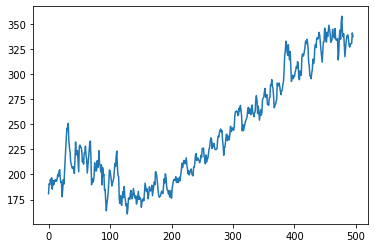

In [9]:
plt.plot(np.convolve(value_loss, np.ones(N)/N, mode='valid'))

In [10]:
torch.save(state_dict, "A3C/model")

!tar -czvf submission.tar.gz main.py A3C/model A3C/agent.py A3C/model.py shared/map.py


a main.py
a A3C/model
a A3C/agent.py
a A3C/model.py
a shared/map.py
